# Transporter statistics

In [1]:
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt, numpy as np
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def make_tax_table(df,name="",rank="superkingdom"):
    df_t = df.groupby(rank).sum()
    df_tp = df_t.div(df_t.sum())*100
    df_tp_mean = df_tp.mean(axis=1)
    df_tp_max = df_tp.max(axis=1)
    df_tp_min = df_tp.min(axis=1)
    df_tp_sd = df_tp.std(axis=1)
    table = pd.concat([df_tp_mean,df_tp_max,df_tp_min,df_tp_sd],axis=1)
    table.columns = [name+" mean(%)",name+" max(%)",name+" min(%)",name+" std"]
    table.rename(index=lambda x: x.split("_")[0], inplace=True)
    return table

In [89]:
transinfo = pd.read_csv("results/selected_transporters_classified.tab", header=0, sep="\t", index_col=0)
transinfo.head()

,substrate_category,type,name,abbreviation
transporter,,,,
T1068,AA peptide,2a,cyclic peptide transporter,AA-PEP
T534,AA peptide,2a,lao: LAO/AO transport,AA-PEP
T52,AA peptide,2a,livcs: branched-chain amino acid transport,AA-PEP
T37,AA peptide,2a,potA: polyamine ABC transporter,AA-PEP
T42,AA peptide,3a,proV: glycine betaine/L-proline,AA-PEP


Read gene abundance values with taxonomic annotations.

In [9]:
mg_cov = pd.read_table("data/mg/all_genes.tpm.taxonomy.tsv.gz", header=0, sep="\t", index_col=0)
mt_cov = pd.read_table("data/mt/all_genes.tpm.taxonomy.tsv.gz", header=0, sep="\t", index_col=0)

Read orf level transporter data.

In [7]:
mg_transcov = pd.read_table("results/mg/all_transporters.tpm.taxonomy.tsv.gz", header=0, sep="\t", index_col=0)
mt_transcov = pd.read_table("results/mt/all_transporters.tpm.taxonomy.tsv.gz", header=0, sep="\t", index_col=0)

In [31]:
mg_select_transcov = pd.read_table("results/mg/select_trans_genes.tpm.tsv", header=0, sep="\t", index_col=0)
mt_select_transcov = pd.read_table("results/mt/select_trans_genes.tpm.tsv", header=0, sep="\t", index_col=0)

Read transporter abundances.

In [8]:
mg_trans = pd.read_csv("results/mg/all_trans.tpm.tsv", header=0, sep="\t", index_col=0)
mt_trans = pd.read_csv("results/mt/all_trans.tpm.tsv", header=0, sep="\t", index_col=0)

Generate taxonomy overview table.

In [10]:
mg_tax_table = make_tax_table(mg_cov,name="MG ")
mg_tax_table_cyano = make_tax_table(mg_cov,name="MG ",rank="phylum").loc["Cyanobacteria"]
mg_tax_table = pd.concat([mg_tax_table,pd.DataFrame(mg_tax_table_cyano).T])

In [12]:
mt_tax_table = make_tax_table(mt_cov,name="MT ")
mt_tax_table_cyano = make_tax_table(mt_cov,name="MT ",rank="phylum").loc["Cyanobacteria"]
mt_tax_table = pd.concat([mt_tax_table,pd.DataFrame(mt_tax_table_cyano).T])

In [13]:
tax_table = pd.concat([mg_tax_table,mt_tax_table],axis=1).round(2)

In [14]:
tax_table.to_csv("results/tax_table.tab",sep="\t")

Make table with number of ORFs, ORFs classified as transporters, min, mean and max coverage for transporter ORFs.

In [16]:
num_genes = len(mg_cov)
gene_lengths = pd.read_table("data/mg/all_genes.tpm.tsv.gz", usecols=[1])
gene_lengths = np.round(gene_lengths.mean())

In [22]:
# Number of transporter genes (genes with sum > 0)
mg_num_trans_genes = len(mg_transcov.loc[mg_transcov.groupby(level=0).sum().sum(axis=1)>0])
# Percent of transporter genes
mg_num_trans_genes_p = np.round((mg_num_trans_genes / float(num_genes))*100,2)
# Mean total coverage for transporter genes across the samples
mg_transcov_mean = np.round(((mg_transcov.groupby(level=0).sum().sum().mean()) / 1e6)*100,2)
# Minimum total coverage for transporter genes across the samples
mg_transcov_min = np.round(((mg_transcov.groupby(level=0).sum().sum().min()) / 1e6)*100,2)
# Maximum ...
mg_transcov_max = np.round(((mg_transcov.groupby(level=0).sum().sum().max()) / 1e6)*100,2)
# Standard dev
mg_transcov_std = np.round(((mg_transcov.groupby(level=0).sum().sum() / 1e6)*100).std(),2)

In [23]:
# Number of transporter genes (genes with sum > 0)
mt_num_trans_genes = len(mt_transcov.loc[mt_transcov.groupby(level=0).sum().sum(axis=1)>0])
# Percent of transporter genes
mt_num_trans_genes_p = np.round((mt_num_trans_genes / float(num_genes))*100,2)
# Mean total coverage for transporter genes across the samples
mt_transcov_mean = np.round(((mt_transcov.groupby(level=0).sum().sum().mean()) / 1e6)*100,2)
# Minimum total coverage for transporter genes across the samples
mt_transcov_min = np.round(((mt_transcov.groupby(level=0).sum().sum().min()) / 1e6)*100,2)
# Maximum ...
mt_transcov_max = np.round(((mt_transcov.groupby(level=0).sum().sum().max()) / 1e6)*100,2)
# Standard dev
mt_transcov_std = np.round(((mt_transcov.groupby(level=0).sum().sum() / 1e6)*100).std(),2)

In [30]:
stats_df = pd.DataFrame(data={
                   "Transporter genes": ["{} ({}%)".format(mg_num_trans_genes,mg_num_trans_genes_p),"{} ({}%)".format(mt_num_trans_genes,mt_num_trans_genes_p)],
                   "Transporter mean": ["{}%".format(mg_transcov_mean),"{}%".format(mt_transcov_mean)],
                   "Transporter min": ["{}%".format(mg_transcov_min),"{}%".format(mt_transcov_min)],
                   "Transporter max": ["{}%".format(mg_transcov_max),"{}%".format(mt_transcov_max)],
                   "Transporter std": ["{}%".format(mg_transcov_std),"{}%".format(mt_transcov_std)]},index=["MG","MT"]).T
stats_df.to_csv("results/transporter_stats.tab",sep="\t")
stats_df

,MG,MT
Transporter genes,39634 (0.85%),20166 (0.43%)
Transporter max,1.23%,1.28%
Transporter mean,0.94%,0.78%
Transporter min,0.55%,0.07%
Transporter std,0.2%,0.29%


Do the same but for the selected transporters.

In [33]:
# Number of transporter genes (genes with sum > 0)
mg_num_trans_genes = len(mg_select_transcov.loc[mg_select_transcov.groupby(level=0).sum().sum(axis=1)>0])
# Percent of transporter genes
mg_num_trans_genes_p = np.round((mg_num_trans_genes / float(num_genes))*100,2)
# Mean total coverage for transporter genes across the samples
mg_select_transcov_mean = np.round(((mg_select_transcov.groupby(level=0).sum().sum().mean()) / 1e6)*100,2)
# Minimum total coverage for transporter genes across the samples
mg_select_transcov_min = np.round(((mg_select_transcov.groupby(level=0).sum().sum().min()) / 1e6)*100,2)
# Maximum ...
mg_select_transcov_max = np.round(((mg_select_transcov.groupby(level=0).sum().sum().max()) / 1e6)*100,2)
# Standard dev
mg_select_transcov_std = np.round(((mg_select_transcov.groupby(level=0).sum().sum() / 1e6)*100).std(),2)

In [35]:
# Number of transporter genes (genes with sum > 0)
mt_num_trans_genes = len(mt_select_transcov.loc[mt_select_transcov.groupby(level=0).sum().sum(axis=1)>0])
# Percent of transporter genes
mt_num_trans_genes_p = np.round((mt_num_trans_genes / float(num_genes))*100,2)
# Mean total coverage for transporter genes across the samples
mt_select_transcov_mean = np.round(((mt_select_transcov.groupby(level=0).sum().sum().mean()) / 1e6)*100,2)
# Minimum total coverage for transporter genes across the samples
mt_select_transcov_min = np.round(((mt_select_transcov.groupby(level=0).sum().sum().min()) / 1e6)*100,2)
# Maximum ...
mt_select_transcov_max = np.round(((mt_select_transcov.groupby(level=0).sum().sum().max()) / 1e6)*100,2)
# Standard dev
mt_select_transcov_std = np.round(((mt_select_transcov.groupby(level=0).sum().sum() / 1e6)*100).std(),2)

In [36]:
select_stats_df = pd.DataFrame(data={
                   "Selected transporter genes": ["{} ({}%)".format(mg_num_trans_genes,mg_num_trans_genes_p),"{} ({}%)".format(mt_num_trans_genes,mt_num_trans_genes_p)],
                   "Selected transporter mean": ["{}%".format(mg_select_transcov_mean),"{}%".format(mt_select_transcov_mean)],
                   "Selected transporter min": ["{}%".format(mg_select_transcov_min),"{}%".format(mt_select_transcov_min)],
                   "Selected transporter max": ["{}%".format(mg_select_transcov_max),"{}%".format(mt_select_transcov_max)],
                   "Selected transporter std": ["{}%".format(mg_select_transcov_std),"{}%".format(mt_select_transcov_std)]},index=["MG","MT"]).T
select_stats_df.to_csv("results/selected_transporter_stats.tab",sep="\t")
select_stats_df

,MG,MT
Selected transporter genes,15745 (0.34%),7734 (0.17%)
Selected transporter max,0.55%,0.51%
Selected transporter mean,0.39%,0.29%
Selected transporter min,0.21%,0.03%
Selected transporter std,0.08%,0.11%


## Calculate and plot distributions per taxonomic subsets.

In [38]:
cya_orfs = mg_transcov.loc[mg_transcov.phylum=="Cyanobacteria"].index
bac_orfs = mg_transcov.loc[(mg_transcov.phylum!="Cyanobacteria")&(mg_transcov.superkingdom=="Bacteria")].index
euk_orfs = mg_transcov.loc[mg_transcov.superkingdom=="Eukaryota"].index

Calculate contribution of taxonomic subsets

In [61]:
taxgroup_df = pd.DataFrame(columns=["MG","MT"],index=["Bacteria","Cyanobacteria","Eukaryota"])

In [68]:
mg_all_transcov_info = pd.merge(transinfo,mg_transcov,left_index=True,right_on="transporter")
mg_bac_transcov_info = pd.merge(transinfo,mg_transcov.loc[bac_orfs],left_index=True,right_on="transporter")
mg_euk_transcov_info = pd.merge(transinfo,mg_transcov.loc[euk_orfs],left_index=True,right_on="transporter")
mg_cya_transcov_info = pd.merge(transinfo,mg_transcov.loc[cya_orfs],left_index=True,right_on="transporter")

In [69]:
mt_all_transcov_info = pd.merge(transinfo,mt_transcov,left_index=True,right_on="transporter")
mt_bac_transcov_info = pd.merge(transinfo,mt_transcov.loc[bac_orfs],left_index=True,right_on="transporter")
mt_euk_transcov_info = pd.merge(transinfo,mt_transcov.loc[euk_orfs],left_index=True,right_on="transporter")
mt_cya_transcov_info = pd.merge(transinfo,mt_transcov.loc[cya_orfs],left_index=True,right_on="transporter")

In [66]:
mg_cya_part = mg_cya_transcov_info.groupby("transporter").sum().sum().div(mg_all_transcov_info.groupby("transporter").sum().sum())*100
mi,ma,me = mg_cya_part.min(),mg_cya_part.max(),mg_cya_part.mean()
taxgroup_df.loc["Cyanobacteria","MG"] = "{}% ({}-{}%)".format(round(me,2),round(mi,2),round(ma,2))

mg_euk_part = mg_euk_transcov_info.groupby("transporter").sum().sum().div(mg_all_transcov_info.groupby("transporter").sum().sum())*100
mi,ma,me = mg_euk_part.min(),mg_euk_part.max(),mg_euk_part.mean()
taxgroup_df.loc["Eukaryota","MG"] = "{}% ({}-{}%)".format(round(me,2),round(mi,2),round(ma,2))

mg_bac_part = mg_bac_transcov_info.groupby("transporter").sum().sum().div(mg_all_transcov_info.groupby("transporter").sum().sum())*100
mi,ma,me = mg_bac_part.min(),mg_bac_part.max(),mg_bac_part.mean()
taxgroup_df.loc["Bacteria","MG"] = "{}% ({}-{}%)".format(round(me,2),round(mi,2),round(ma,2))

In [70]:
mt_cya_part = mt_cya_transcov_info.groupby("transporter").sum().sum().div(mt_all_transcov_info.groupby("transporter").sum().sum())*100
mi,ma,me = mt_cya_part.min(),mt_cya_part.max(),mt_cya_part.mean()
taxgroup_df.loc["Cyanobacteria","MT"] = "{}% ({}-{}%)".format(round(me,2),round(mi,2),round(ma,2))

mt_euk_part = mt_euk_transcov_info.groupby("transporter").sum().sum().div(mt_all_transcov_info.groupby("transporter").sum().sum())*100
mi,ma,me = mt_euk_part.min(),mt_euk_part.max(),mt_euk_part.mean()
taxgroup_df.loc["Eukaryota","MT"] = "{}% ({}-{}%)".format(round(me,2),round(mi,2),round(ma,2))

mt_bac_part = mt_bac_transcov_info.groupby("transporter").sum().sum().div(mt_all_transcov_info.groupby("transporter").sum().sum())*100
mi,ma,me = mt_bac_part.min(),mt_bac_part.max(),mt_bac_part.mean()
taxgroup_df.loc["Bacteria","MT"] = "{}% ({}-{}%)".format(round(me,2),round(mi,2),round(ma,2))

In [71]:
taxgroup_df

,MG,MT
Bacteria,95.43% (90.26-97.84%),79.53% (22.91-96.93%)
Cyanobacteria,1.64% (0.39-6.59%),4.97% (0.27-36.06%)
Eukaryota,2.68% (0.36-7.62%),15.47% (2.18-76.58%)


### Taxonomic subsets per substrate category

In [148]:
def calculate_mean_total_substrate_subset(df,df_sum,subset,var_name="Sample",value_name="%"):
    cols = ["fam","transporter","substrate_category","name"]
    # Sum to protein family
    x = df.groupby(["fam","transporter","substrate_category","name"]).sum().reset_index()
    cols.pop(cols.index("fam"))
    # Calculate mean of transporters
    x.groupby(cols).mean().reset_index()
    xt = x.copy()
    # Normalize to sum of all transporters
    x.iloc[:,4:] = x.iloc[:,4:].div(df_sum)*100
    # Sum percent to substrate category
    x = x.groupby("substrate_category").sum()
    # Melt dataframe and add subset column
    x["substrate_category"] = x.index
    xm = pd.melt(x,id_vars="substrate_category", var_name="Sample",value_name="%")
    xm = xm.assign(Subset=pd.Series(data=subset,index=xm.index))
    return xm,xt

In [149]:
# Get contribution of bacterial transporters to total for substrate category
mg_bac_cat_melt,mg_bac_cat = calculate_mean_total_substrate_subset(mg_bac_transcov_info,mg_trans.sum(),"Bacteria")
# Get contribution of eukaryotic transporters to total for substrate category
mg_euk_cat_melt,mg_euk_cat = calculate_mean_total_substrate_subset(mg_euk_transcov_info,mg_trans.sum(),"Eukaryota")
# Get contribution of cyanobacterial transporters to total for substrate category
mg_cya_cat_melt,mg_cya_cat = calculate_mean_total_substrate_subset(mg_cya_transcov_info,mg_trans.sum(),"Cyanobacteria")

In [150]:
# Get contribution of bacterial transporters to total for substrate category
mt_bac_cat_melt,mt_bac_cat = calculate_mean_total_substrate_subset(mt_bac_transcov_info,mt_trans.sum(),"Bacteria")
# Get contribution of eukaryotic transporters to total for substrate category
mt_euk_cat_melt,mt_euk_cat = calculate_mean_total_substrate_subset(mt_euk_transcov_info,mt_trans.sum(),"Eukaryota")
# Get contribution of cyanobacterial transporters to total for substrate category
mt_cya_cat_melt,mt_cya_cat = calculate_mean_total_substrate_subset(mt_cya_transcov_info,mt_trans.sum(),"Cyanobacteria")

In [151]:
# Concatenate dataframes for metagenomes
mg_subsets_cat = pd.concat([pd.concat([mg_bac_cat_melt,mg_euk_cat_melt]),mg_cya_cat_melt])
mg_subsets_cat = mg_subsets_cat.assign(Dataset=pd.Series(data="MG",index=mg_subsets_cat.index))

In [152]:
# Concatenate dataframes for metagenomes
mt_subsets_cat = pd.concat([pd.concat([mt_bac_cat_melt,mt_euk_cat_melt]),mt_cya_cat_melt])
mt_subsets_cat = mt_subsets_cat.assign(Dataset=pd.Series(data="MT",index=mt_subsets_cat.index))

** Concatenate MG and MT **

In [153]:
subsets_cat = pd.concat([mg_subsets_cat,mt_subsets_cat])

### Plot substrate category distributions

In [139]:
cats = transinfo.substrate_category.unique()

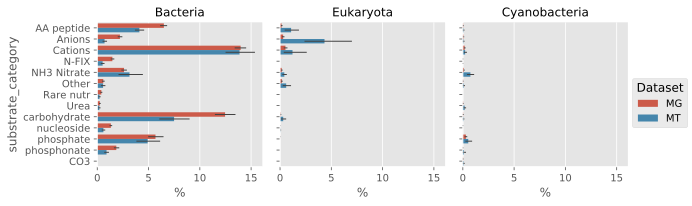

In [155]:
ax = sns.factorplot(kind="bar",data=subsets_cat.loc[subsets_cat.substrate_category.isin(cats)],hue="Dataset", y="substrate_category", x="%", col="Subset",
                    errwidth=1, size=3)
ax.set_titles("{col_name}")
plt.savefig("results/figures/substrate_category_subsets.png",dpi=300,bbox_inches="tight")

## Generate kingdom/phylum level taxonomic plots

Metagenomes

In [157]:
mg_taxcov = pd.read_table("data/mg/all_genes.tpm.taxonomy.tsv.gz")

In [169]:
# Get sum of abundances at superkingdom level
mg_k = mg_taxcov.groupby("superkingdom").sum()
# Normalize to %
mg_kn = mg_k.div(mg_k.sum())*100
mg_kn = mg_kn.loc[["Archaea","Bacteria","Eukaryota","Viruses","Unclassified.sequences","other sequences"]]
mg_kn = mg_kn.loc[mg_kn.sum(axis=1).sort_values(ascending=False).index]
# Swtich Proteobacterial classes to phylum
mg_taxcov.loc[mg_taxcov.phylum=="Proteobacteria","phylum"] = mg_taxcov.loc[mg_taxcov.phylum=="Proteobacteria","class"]
# Normalize at phylum level
mg_p = mg_taxcov.groupby("phylum").sum()
mg_pn = mg_p.div(mg_p.sum())*100

Metatranscriptomes

In [170]:
mt_taxcov = pd.read_table("data/mt/all_genes.tpm.taxonomy.tsv.gz")

In [171]:
# Get sum of abundances at superkingdom level
mt_k = mt_taxcov.groupby("superkingdom").sum()
# Normalize to %
mt_kn = mt_k.div(mt_k.sum())*100
mt_kn = mt_kn.loc[["Archaea","Bacteria","Eukaryota","Viruses","Unclassified.sequences","other sequences"]]
mt_kn = mt_kn.loc[mt_kn.sum(axis=1).sort_values(ascending=False).index]
# Swtich Proteobacterial classes to phylum
mt_taxcov.loc[mt_taxcov.phylum=="Proteobacteria","phylum"] = mt_taxcov.loc[mt_taxcov.phylum=="Proteobacteria","class"]
# Normalize at phylum level
mt_p = mt_taxcov.groupby("phylum").sum()
mt_pn = mt_p.div(mt_p.sum())*100

Get common taxa for both datasets by taking the union of the top 15 most abundant taxa

In [174]:
mg_taxa = mg_pn.mean(axis=1).sort_values(ascending=False).head(15).index
mt_taxa = mt_pn.mean(axis=1).sort_values(ascending=False).head(15).index
taxa = set(mg_taxa).union(set(mt_taxa))

Single out eukaryotic taxa

In [177]:
euk_taxa = []
for t in taxa:
    k = mg_taxcov.loc[mg_taxcov.phylum==t,"superkingdom"].unique()[0]
    if k == "Eukaryota": euk_taxa.append(t)

Sort the taxa by their mean abundance in the mg data

In [212]:
taxa_sort = mg_pn.loc[taxa].mean(axis=1).sort_values(ascending=False).index
taxa_colors = dict(zip(taxa_sort,(sns.color_palette("Set1",7)+sns.color_palette("Set2",7)+sns.color_palette("Dark2",5))))
color2taxmap = {}
for t, c in taxa_colors.items():
    color2taxmap[c] = t

In [231]:
def set_euk_hatches(ax):
    for patch in ax.patches:
        t = color2taxmap[patch.properties()['facecolor'][0:-1]]
        if t in euk_taxa:
            patch.set_hatch("////")

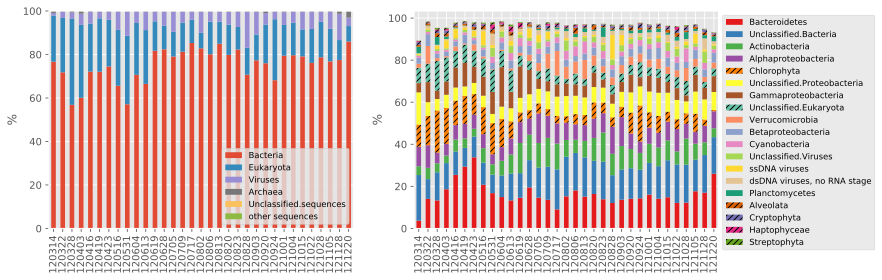

In [242]:
fig,axes = plt.subplots(ncols=2,nrows=1, figsize=(12,4))
# Plot the kingdoms
ax1 = mg_kn.T.plot(kind="bar",stacked=True,ax=axes[0])
ax1.legend(loc="lower right",fontsize="small")
ax1.set_ylabel("%")

# Plot the phyla
ax2 = mg_pn.loc[taxa_sort].T.plot(kind="bar",stacked=True, color=[taxa_colors[tax] for tax in taxa_sort], legend=None,ax=axes[1])
set_euk_hatches(ax2)
ax2.set_ylabel("%")
ax2.legend(bbox_to_anchor=(1,1),fontsize="small");
plt.savefig("results/figures/mg_taxplot.png", dpi=300, bbox_inches="tight")

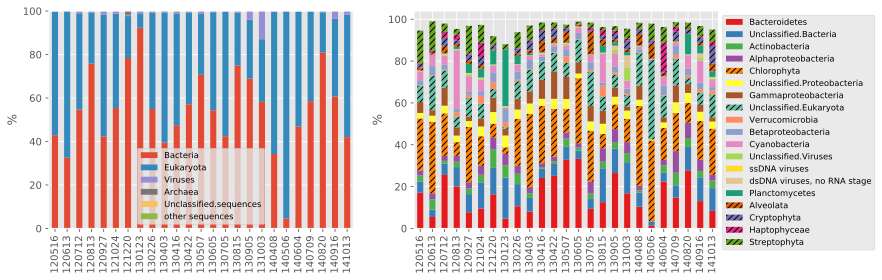

In [245]:
fig,axes = plt.subplots(ncols=2,nrows=1, figsize=(12,4))
# Plot the kingdoms
ax1 = mt_kn.T.plot(kind="bar",stacked=True,ax=axes[0])
ax1.legend(loc="lower center",fontsize="small")
ax1.set_ylabel("%")

# Plot the phyla
ax2 = mt_pn.loc[taxa_sort].T.plot(kind="bar",stacked=True, color=[taxa_colors[tax] for tax in taxa_sort], legend=None,ax=axes[1])
set_euk_hatches(ax2)
ax2.set_ylabel("%")
ax2.legend(bbox_to_anchor=(1,1),fontsize="small");
plt.savefig("results/figures/mt_taxplot.png", dpi=300, bbox_inches="tight")